# 12장 다중 분류 문제 해결하기

### 2. 상관도 그래프

In [1]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/SoongMoo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

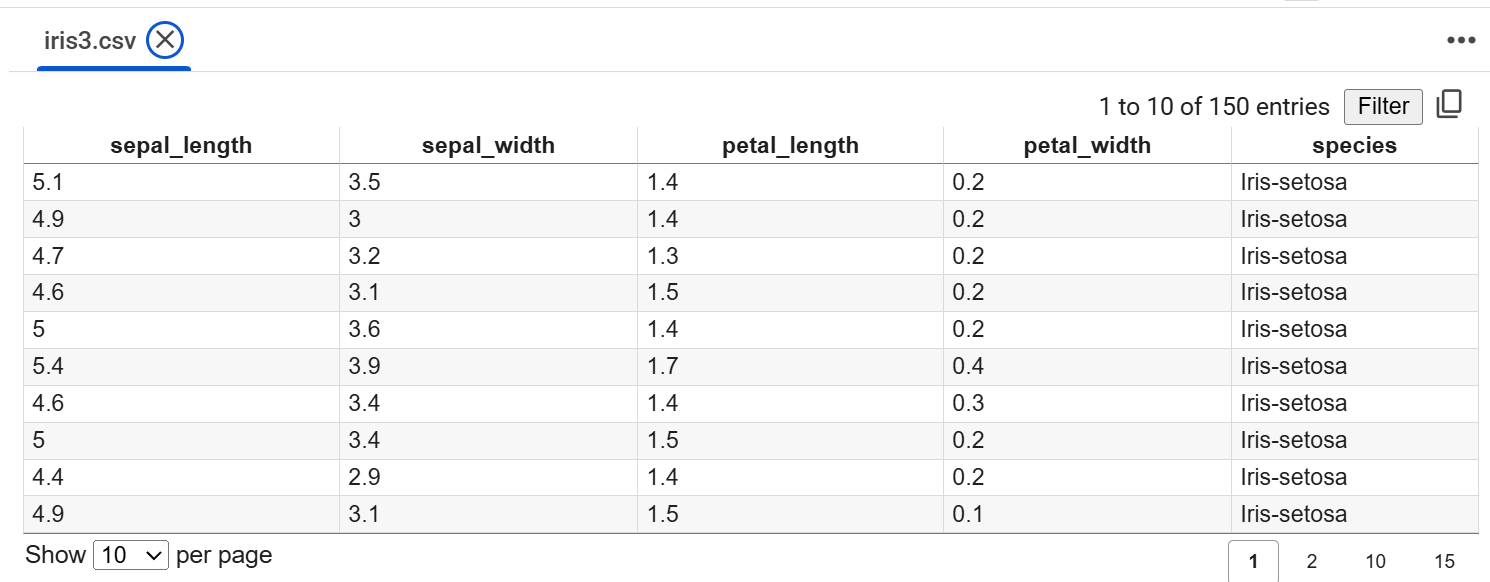<br />
붓꽃이라는 아이리스는 3가지 품종으로 되어있고 품종에 따른 특징을 나타낸 것이다.<br />
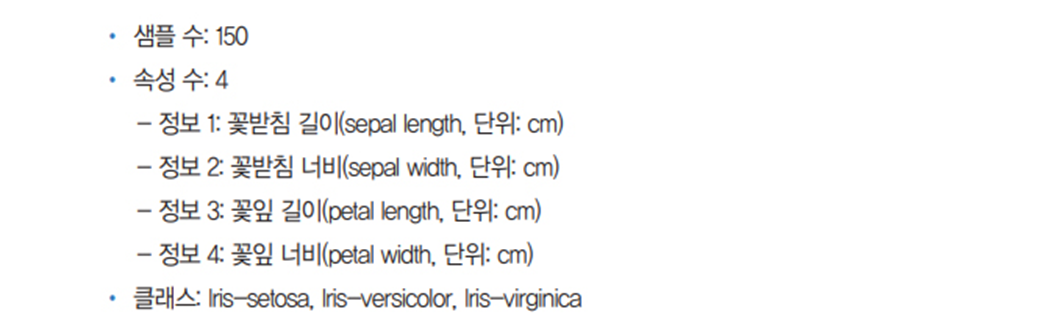<br />
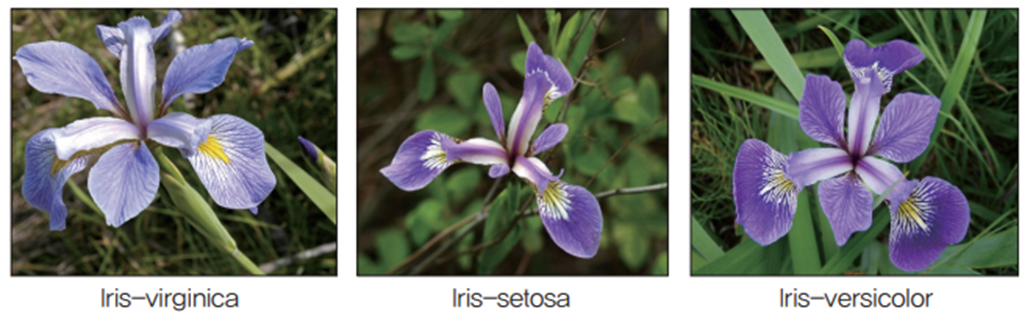<br />
딥러닝을 통해 세개의 품종을 구별할 수 있는지를 확인해보는 것이다.

In [2]:
# 첫 5줄을 봅니다.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


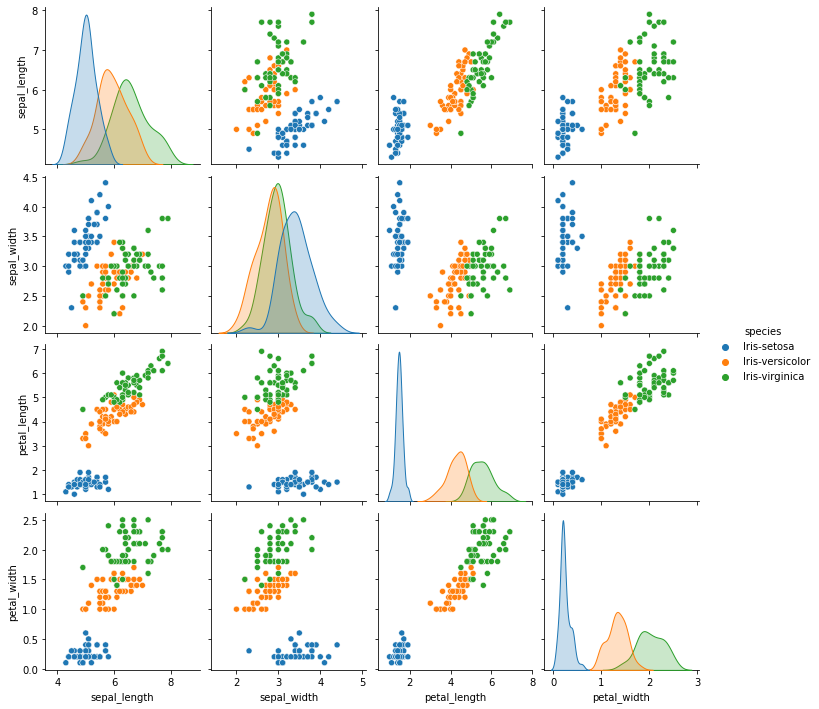

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관도 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');  # hue는 기준을 정하는 것인데 우리가 알고 싶은 것이 품종이므로 species를 정했다.
plt.show()
# 이 그래프를 통해 꽃이이 어떻게 형성되어 있는지를 알 수 있다. 같은 종류끼리는 군집되어 있어 품종에 따라 다르다는 것을 알 수 있다.

## 3. 원-핫 인코딩

In [4]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다. 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


원-핫 인코딩 처리<br />
문자로 되어 있는 것을 숫자로 바꿔주는 것을 말한다.<br />
예를 글어 setosa는 100 , versicolor는 010, virginia는 001이 되도록 만들어 준다 <br />
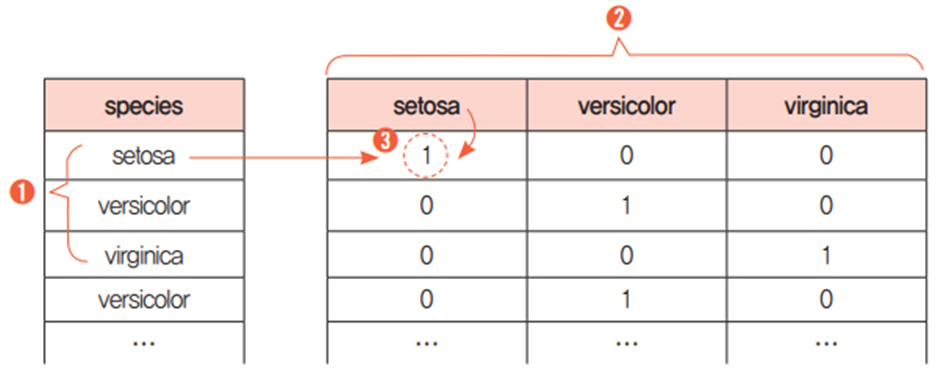<br />

In [5]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y) # get_dummies라는 함수를 이용해서 원-핫 엔코딩을 한다.

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


## 4. 소프트맥스

소프트 맥스는 여러개 중에 한개를 가져올 때 사용하며<br />
여러개를 다 더한 값은 1이되고 그 중 제일 큰 값을 가져오는 것이다.<br />
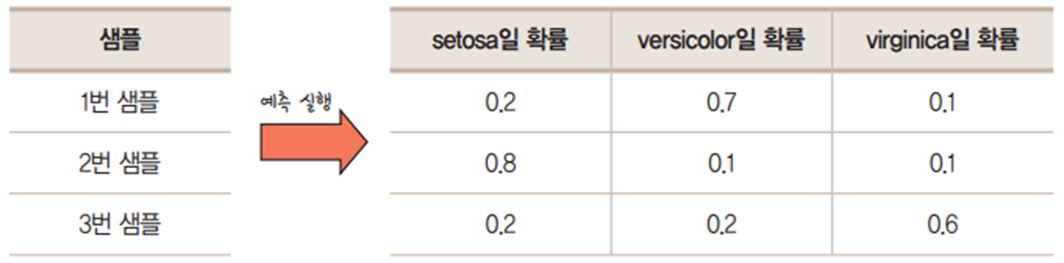

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax')) # softmax : 3종류이므로 3개의 값을 가져오고 이 3개의 합의 값이 1이될 때 그 중 제일 큰 값이 예측 결과 이다.
model.summary()

# 모델 컴파일 : 손실함수가 categorical_crossentropy인 것은 여러개 중에 하나를 결정할 때 사용하는 것이다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 2ms/step - loss: 1.9954 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 1.4589 - accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 1.2054 - accuracy: 0.3333
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0

## 5. 아이리스 품족 예측 실행

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 2ms/step - loss: 1.4888 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 1.0854 - accuracy: 0.4067
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.6000
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0

In [ ]:
import numpy as np

# 새로운 입력 데이터 (꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])

# 예측 수행
prediction = model.predict(new_sample)

# 예측 확률 출력
print("클래스별 예측 확률:", prediction[0])

# 예측 클래스 이름 가져오기
predicted_class_index = np.argmax(prediction[0])
class_names = y.columns  # 원-핫 인코딩된 컬럼명이 클래스명
predicted_class_name = class_names[predicted_class_index]

print(f"예측된 클래스: {predicted_class_name}")